In [2]:
#Topic modelling on customer reviews
# Amazon's Fashion Product
#Data from Dataworld
#35MB
#10,000 rows and 17 Columns
#Unsupervised Learning
#Based on Customer Reviews , average_review_rating,customers_who_bought_this_item_also_bought
#average_review_rating based on customer_reviews 
#sentiment Analysis

# Topic Modelling 
## on Customer Reviews

In [3]:
from __future__ import print_function
import warnings


In [4]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the Dataset

In [5]:
df='./datasets/amazon_co-ecommerce_sample.csv'

In [6]:
product = pd.read_csv(df)

In [7]:
product.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

In [8]:
product.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
average_review_rating                           object
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

In [9]:
product.customer_reviews[0]
        


"Worth Buying For The Pictures Alone (As Ever) // 4.0 // 6 April 2014 // By\n    \n    Copnovelist\n  \n on 6 April 2014 // Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography. // 5.0 // 11 April 2015 // By\n    \n    richard\n  \n on 11 April 2015 // Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase' // 5.0 // 23 April 2014 // By\n  

## Check for the Null Values in Customer Reviews

In [10]:
x = product.customer_reviews.isnull().sum()
print(x)

21


# EDA 

In [11]:
#There are 21 null records. I update those Null records.

product['customer_reviews'] = product.customer_reviews.replace(np.nan, '', regex=True)

# Convert the Reviews into Document Word Matrix

CountVectorizer / TFIDFvectorizer :  Using either one of them raw documents are converted into Document Word Matrix.

In [12]:
# Assigning the CountVectorizer , Removing stopwords, Removing numbers and punctuation. 
co_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10,ngram_range=(1,1))

# Assigning the tfidfVectorizer , Removing stopwords, Removing numbers and punctuation. 
tf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10,ngram_range=(1,1))

In [13]:
# Reading the Reviews(Vectorize the text)

#countvectorizer
covectorized_reviews = co_vectorizer.fit_transform(product.customer_reviews)
print(covectorized_reviews.shape)

#tfidf_vectorizer (In 2 ways)
tfidfvectorized_reviews = tf_vectorizer.fit_transform(product.customer_reviews)
print(tfidfvectorized_reviews.shape)

tfidf_vectorizer= TfidfVectorizer(**co_vectorizer.get_params())
tfidfvectorized2_reviews = tfidf_vectorizer.fit_transform(product.customer_reviews)
print(tfidfvectorized2_reviews.shape)


(10000, 4992)
(10000, 4992)
(10000, 4992)


In [14]:
stop_words = set(stopwords.words('english'))
print(stop_words)
print(len(stop_words))

{'am', 'doing', 'and', "should've", 'll', "you'll", 'after', 'while', 't', 'between', "she's", 'it', 'his', 'about', 'further', 'our', 'just', 'there', 'up', 'so', 'this', 'has', 'too', 'hers', 'aren', 'shan', 'as', 'haven', "it's", "mightn't", 'you', "that'll", 'hasn', 'from', 'again', "shouldn't", 'those', 'ours', 'an', 'ourselves', 'by', 'her', 'here', 'i', 'will', 'these', 'during', 'yourself', 'above', 'mustn', 'my', 'both', 'of', 'him', 'their', 'hadn', 'he', 'ain', 'd', 'didn', "aren't", 'same', 'now', "shan't", 'yourselves', 'below', 'your', 'nor', 'shouldn', "won't", 'being', 'into', 'why', 'other', 'some', 'own', 'weren', 'with', "wouldn't", 'the', 'm', 'its', 'had', 're', 'wouldn', 'do', 'through', 'himself', 'if', "hadn't", 's', 'because', "wasn't", 'off', 'itself', 'be', 'at', 'before', 'we', 'where', 'only', 'them', 'which', 've', "don't", 'over', 'yours', "isn't", 'y', "hasn't", 'once', 'against', 'what', 'that', 'don', 'isn', 'any', 'wasn', 'have', "mustn't", 'a', 'whom

# Fit Latent Dirichelet Allocation Models

In [15]:
# FITTING THE LDA FOR COUNTVECTORIZER
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0, learning_method='online')
lda_tf.fit(covectorized_reviews)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
# FITTING THE LDA TFIDF VECTORIZER
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0, learning_method='online')
lda_tfidf.fit(tfidfvectorized_reviews)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

# Visualize the Model with pyLDAvis

In [17]:
#GRAPHICAL REPRESENTATION FOR TOPICS FOR COUNTVECTORIZER 
pyLDAvis.sklearn.prepare(lda_tf, covectorized_reviews, co_vectorizer)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.120026  0.037132       1        1  24.408248
4     -0.175698 -0.131559       2        1  17.896970
3     -0.107684  0.089327       3        1  16.177100
6     -0.009012  0.131648       4        1  12.320697
8     -0.118715 -0.039006       5        1   9.754799
5     -0.138900 -0.106226       6        1   7.772186
2      0.065086  0.213436       7        1   4.941908
9      0.000431 -0.143052       8        1   2.836112
1      0.235288  0.164086       9        1   2.389976
0      0.369230 -0.215788      10        1   1.502005, topic_info=     Category          Freq         Term         Total  loglift  logprob
term                                                                    
2985  Default   5382.000000          nov   5382.000000  30.0000  30.0000
2353  Default   3784.000000         july   3784.000000  29.0000  29.0000
271   Default   4114.000000          aug   4114.000000  28.0000  28.0000
1876  Default  10871.000000         good  10871.000000  27.0000  27.0000
633   Default   1871.000000        cards   1871.000000  26.0000  26.0000
2289  Default   9296.000000          jan   9296.000000  25.0000  25.0000
1128  Default   7665.000000          dec   7665.000000  24.0000  24.0000
3026  Default   4015.000000          old   4015.000000  23.0000  23.0000
3473  Default   4842.000000      quality   4842.000000  22.0000  22.0000
2826  Default   1829.000000        model   1829.000000  21.0000  21.0000
3014  Default   4599.000000          oct   4599.000000  20.0000  20.0000
4973  Default   3294.000000         year   3294.000000  19.0000  19.0000
1912  Default  11398.000000        great  11398.000000  18.0000  18.0000
2503  Default    954.000000         lego    954.000000  17.0000  17.0000
136   Default   2124.000000       amazon   2124.000000  16.0000  16.0000
2620  Default   3169.000000        loves   3169.000000  15.0000  15.0000
1776  Default   4156.000000          fun   4156.000000  14.0000  14.0000
204   Default   3635.000000        april   3635.000000  13.0000  13.0000
2676  Default   4543.000000          mar   4543.000000  12.0000  12.0000
1364  Default   1994.000000         easy   1994.000000  11.0000  11.0000
4582  Default   2983.000000          toy   2983.000000  10.0000  10.0000
1631  Default   1504.000000       figure   1504.000000   9.0000   9.0000
4724  Default   1909.000000          use   1909.000000   8.0000   8.0000
1793  Default   3454.000000         game   3454.000000   7.0000   7.0000
3910  Default   2906.000000          set   2906.000000   6.0000   6.0000
2394  Default   1639.000000         kids   1639.000000   5.0000   5.0000
2536  Default   2867.000000         like   2867.000000   4.0000   4.0000
1605  Default   5300.000000          feb   5300.000000   3.0000   3.0000
2617  Default   1925.000000       lovely   1925.000000   2.0000   2.0000
486   Default   4638.000000       bought   4638.000000   1.0000   1.0000
...       ...           ...          ...           ...      ...      ...
2131  Topic10     56.533693       hybrid     57.438734   4.1825  -5.0865
265   Topic10     54.057280   attempting     54.962400   4.1818  -5.1313
4298  Topic10     49.589476       submit     50.494553   4.1803  -5.2176
1606  Topic10     47.924612     february     48.829644   4.1797  -5.2517
805   Topic10     47.887101       client     48.792126   4.1796  -5.2525
3012  Topic10     47.780104     occurred     48.685158   4.1796  -5.2548
4737  Topic10     46.380554        vader     47.285761   4.1790  -5.2845
1406  Topic10     45.622194        embed     46.527219   4.1787  -5.3010
1338  Topic10     45.346909         duck     46.252196   4.1786  -5.3070
4686  Topic10     45.226401    undefined     46.131426   4.1786  -5.3097
3258  Topic10     44.937399     playback     45.842413   4.1784  -5.3161
3396  Topic10     44.856460         prod     45.761472   4.1784  -5.3179
4705  Topic10     44.811

Large the size , popular topic. small size is least popular topic.
Topic 1 : Its about a chuggington Toy product for thier kids or grand kids. Most of really like the product and says its value for money.3 0r 4 year old kids product.people more interested in buying cartoon themes as toy.Because its make their kids more happy. During Dec or christmas period.
Topic 2 : Regardless of month people are more interested in buying party items like birthday.They ssy like it arrived on  time.Party dress, party bags , baloons. They say its arrived prompty. In party items its important to arrive on time otherwise its not useful for them. so if the 
service is fast people are happy about it.
Topic 3: Its more similar to topic 1 .It says about puzzle , board games,lego.During school holiday time People are looking for something which 
keep their kids engaged for more time.
Topic 4: Its more about adult toys. People find these are really interesting.
Topic 7: During summer time people are interested in buyin more pool items and toys which can play on the sand. Its like during summer time 
mostly visiting beaches.

Topic 8 :Soft toys for for kids to cuddle them. Some buy for thier girl friend . like koala bear, puppet.

I found a interesting thing is , when movie comes like batman, starwars or dinosaur . people are more interested and buying those characters for kids. Always looks for present for christmas or birthday. 
Buying Mini models like Buggati , porche like that.
If the product good quality and arrived on time people comment about it.

In [18]:
#GRAPHICAL REPRESENTATION FOR TOPICS FOR TFIDFCOUNTVECTORIZER 
pyLDAvis.sklearn.prepare(lda_tfidf, tfidfvectorized_reviews, tfidf_vectorizer)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.112191  0.130981       1        1  82.398699
3      0.209559 -0.098249       2        1   2.635775
6     -0.089128 -0.070807       3        1   2.382808
4     -0.053240 -0.008522       4        1   1.944482
5     -0.009338  0.029837       5        1   1.912605
9     -0.034821  0.008381       6        1   1.775285
8     -0.036164  0.009850       7        1   1.774011
2     -0.036115  0.000030       8        1   1.756774
0     -0.036330 -0.001787       9        1   1.747941
1     -0.026613  0.000286      10        1   1.671622, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
2289  Default  504.000000          jan  504.000000  30.0000  30.0000
1128  Default  469.000000          dec  469.000000  29.0000  29.0000
2985  Default  372.000000          nov  372.000000  28.0000  28.0000
3898  Default  294.000000         sept  294.000000  27.0000  27.0000
3014  Default  321.000000          oct  321.000000  26.0000  26.0000
2676  Default  313.000000          mar  313.000000  25.0000  25.0000
2353  Default  273.000000         july  273.000000  24.0000  24.0000
271   Default  280.000000          aug  280.000000  23.0000  23.0000
1912  Default  414.000000        great  414.000000  22.0000  22.0000
1876  Default  411.000000         good  411.000000  21.0000  21.0000
1074  Default  168.000000     customer  168.000000  20.0000  20.0000
136   Default  169.000000       amazon  169.000000  19.0000  19.0000
1490  Default  195.000000    excellent  195.000000  18.0000  18.0000
3400  Default  183.000000      product  183.000000  17.0000  17.0000
2826  Default  148.000000        model  148.000000  16.0000  16.0000
3182  Default  135.000000      perfect  135.000000  15.0000  15.0000
1981  Default  146.000000        happy  146.000000  14.0000  14.0000
1166  Default  127.000000     delivery  127.000000  13.0000  13.0000
2272  Default  138.000000         item  138.000000  12.0000  12.0000
3473  Default  221.000000      quality  221.000000  11.0000  11.0000
4474  Default   77.000000       thanks   77.000000  10.0000  10.0000
3906  Default   81.000000      service   81.000000   9.0000   9.0000
4472  Default   86.000000        thank   86.000000   8.0000   8.0000
2882  Default  112.000000          mrs  112.000000   7.0000   7.0000
1588  Default   73.000000         fast   73.000000   6.0000   6.0000
3178  Default   53.000000       people   53.000000   5.0000   5.0000
4741  Default  128.000000        value  128.000000   4.0000   4.0000
3682  Default   50.000000       review   50.000000   3.0000   3.0000
3272  Default  109.000000      pleased  109.000000   2.0000   2.0000
1542  Default   50.000000          fab   50.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
3878  Topic10    0.156831     selected    1.970553   1.5605  -8.5494
549   Topic10    0.156831      brushed    1.971309   1.5601  -8.5494
3886  Topic10    0.156831         semi    1.972713   1.5594  -8.5494
3885  Topic10    0.156831        sells    1.973082   1.5592  -8.5494
2468  Topic10    0.156831     launched    1.978879   1.5563  -8.5494
3150  Topic10    0.156832         path    1.981207   1.5551  -8.5494
2982  Topic10    0.156831   noticeably    1.991344   1.5500  -8.5494
413   Topic10    0.406939      bicycle    5.859725   1.4242  -7.5959
2644  Topic10    0.159225    magicians    2.341726   1.4031  -8.5343
2341  Topic10    0.156910         josh    3.968414   0.8609  -8.5489
6     Topic10    0.156907     absolute    6.896204   0.3083  -8.5490
2863  Topic10    0.156900      moulded    4.657784   0.7007  -8.5490
2584  Topic10    0.156890   locomotive    4.846582   0.6609  -8.5491
1201  Topic10    0.156878       device    3.518732   0.9810  -8.5491
3332  Topic10    0.156874       powell    4.945440   0.6406  -8.54

# Map the Topic term with 2 Word

In [19]:
# Assigning the CountVectorizer , Removing stopwords, Removing numbers and punctuation. 
co_vectorizer2 = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10,ngram_range=(2,2))

# Assigning the tfidfVectorizer , Removing stopwords, Removing numbers and punctuation. 
tfidf_vectorizer2 = TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10,ngram_range=(2,2))

In [20]:
# Reading the Reviews

#countvectorizer
covectorized_reviews2 = co_vectorizer2.fit_transform(product.customer_reviews)
print(covectorized_reviews2.shape)

#tfidf_vectorizer (In 2 ways)
tfidfvectorized_reviews2 = tfidf_vectorizer2.fit_transform(product.customer_reviews)
print(tfidfvectorized_reviews2.shape)

tfidf_vectorizer3= TfidfVectorizer(**co_vectorizer2.get_params())
tfidfvectorized2_reviews2 = tfidf_vectorizer3.fit_transform(product.customer_reviews)
print(tfidfvectorized2_reviews2.shape)

(10000, 5050)
(10000, 5050)
(10000, 5050)


#  Fit Latent Dirichelet Allocation Models

In [21]:
# FITTING THE LDA FOR COUNTVECTORIZER (Build a Latent Dirichlet Allocation Model)
lda_tf2 = LatentDirichletAllocation(n_components=10, random_state=0, learning_method='online')
lda_tf2.fit(covectorized_reviews2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [22]:
# FITTING THE LDA FOR TFIDF VECTORIZER
lda_tfidf2 = LatentDirichletAllocation(n_components=10, random_state=0, learning_method='online')
lda_tfidf2.fit(tfidfvectorized_reviews2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

# Visualize the Model with pyLDAvis

In [23]:
#GRAPHICAL REPRESENTATION FOR TOPICS USING COUNTVECTORIZER 
pyLDAvis.sklearn.prepare(lda_tf2, covectorized_reviews2, co_vectorizer2)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.117786  0.152606       1        1  18.980113
2     -0.072444  0.234440       2        1  14.889036
9     -0.077200  0.224371       3        1  13.813548
4     -0.083030 -0.076417       4        1  11.318265
3     -0.160905 -0.093009       5        1  11.266011
8     -0.109466 -0.200764       6        1   9.398173
0     -0.075529 -0.210083       7        1   5.779188
7      0.173453 -0.014283       8        1   4.974198
6      0.261271 -0.039671       9        1   4.899220
5      0.261636  0.022810      10        1   4.682248, topic_info=     Category         Freq                Term        Total  loglift  logprob
term                                                                         
73    Default  1317.000000     amazon customer  1317.000000  30.0000  30.0000
4535  Default   990.000000           stars dec   990.000000  29.0000  29.0000
4539  Default  1007.000000           stars jan  1007.000000  28.0000  28.0000
5028  Default  2670.000000            year old  2670.000000  27.0000  27.0000
1847  Default  1694.000000        good quality  1694.000000  26.0000  26.0000
4545  Default   594.000000           stars oct   594.000000  25.0000  25.0000
4542  Default   483.000000           stars mar   483.000000  24.0000  24.0000
4534  Default   447.000000           stars aug   447.000000  23.0000  23.0000
4532  Default   342.000000           star wars   342.000000  22.0000  22.0000
4540  Default   475.000000          stars july   475.000000  21.0000  21.0000
1998  Default   741.000000           great fun   741.000000  20.0000  20.0000
4544  Default   727.000000           stars nov   727.000000  19.0000  19.0000
4095  Default   574.000000         really good   574.000000  18.0000  18.0000
4490  Default   597.000000           son loves   597.000000  17.0000  17.0000
2058  Default   401.000000       great quality   401.000000  16.0000  16.0000
1879  Default   869.000000          good value   869.000000  15.0000  15.0000
2323  Default   437.000000          jan bought   437.000000  14.0000  14.0000
4536  Default   564.000000           stars feb   564.000000  13.0000  13.0000
792   Default   327.000000        customer jan   327.000000  12.0000  12.0000
2316  Default   305.000000          jan amazon   305.000000  11.0000  11.0000
830   Default   373.000000      daughter loves   373.000000  10.0000  10.0000
790   Default   297.000000        customer dec   297.000000   9.0000   9.0000
4533  Default   296.000000         stars april   296.000000   8.0000   8.0000
4011  Default   338.000000      quick delivery   338.000000   7.0000   7.0000
866   Default   282.000000          dec amazon   282.000000   6.0000   6.0000
4880  Default   932.000000         value money   932.000000   5.0000   5.0000
4546  Default   471.000000          stars sept   471.000000   4.0000   4.0000
1843  Default   389.000000          good price   389.000000   3.0000   3.0000
2054  Default   476.000000       great product   476.000000   2.0000   2.0000
3408  Default   300.000000        old daughter   300.000000   1.0000   1.0000
...       ...          ...                 ...          ...      ...      ...
3456  Topic10    38.468450    opened packaging    39.350012   3.0387  -5.2958
854   Topic10    37.774051          day opened    38.655588   3.0383  -5.3140
3493  Topic10    37.589742       pagani huayra    38.471245   3.0382  -5.3189
3495  Topic10    37.150652          paint work    38.032372   3.0379  -5.3306
1073  Topic10    37.027896      diecast models    37.909407   3.0379  -5.3339
3086  Topic10    36.322459      materials good    37.204027   3.0374  -5.3532
3133  Topic10    36.175048       models bought    37.056569   3.0373  -5.3573
3976  Topic10    35.950496      quality models    36.832024   3.0372  -5.3635
207   Topic10    35.242374     autoart diecast    36.123876   3.0367  -5.3834
2787  Topic10    35.108543  looki

In [24]:
#GRAPHICAL REPRESENTATION FOR TOPICS FOR TFIDFCOUNTVECTORIZER 
pyLDAvis.sklearn.prepare(lda_tfidf2, tfidfvectorized2_reviews2, tfidf_vectorizer3)


/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.001987  0.153382       1        1  48.284354
4      0.282545  0.065561       2        1   9.287823
6      0.127813 -0.225330       3        1   8.893307
8     -0.073595 -0.172038       4        1   7.782555
2     -0.016687  0.106690       5        1   5.542670
5      0.011159  0.051131       6        1   4.810918
7     -0.062641  0.035980       7        1   3.897974
0     -0.100889 -0.006021       8        1   3.868629
9     -0.082744 -0.002103       9        1   3.830638
3     -0.082973 -0.007253      10        1   3.801132, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
4544  Default  171.000000         stars nov  171.000000  30.0000  30.0000
4539  Default  199.000000         stars jan  199.000000  29.0000  29.0000
4545  Default  147.000000         stars oct  147.000000  28.0000  28.0000
4542  Default  120.000000         stars mar  120.000000  27.0000  27.0000
4534  Default  101.000000         stars aug  101.000000  26.0000  26.0000
4535  Default  187.000000         stars dec  187.000000  25.0000  25.0000
4536  Default  130.000000         stars feb  130.000000  24.0000  24.0000
4540  Default  109.000000        stars july  109.000000  23.0000  23.0000
4546  Default  109.000000        stars sept  109.000000  22.0000  22.0000
4541  Default   66.000000         stars jun   66.000000  21.0000  21.0000
4533  Default   79.000000       stars april   79.000000  20.0000  20.0000
73    Default  157.000000   amazon customer  157.000000  19.0000  19.0000
792   Default   58.000000      customer jan   58.000000  18.0000  18.0000
2316  Default   56.000000        jan amazon   56.000000  17.0000  17.0000
2348  Default   59.000000          jan good   59.000000  16.0000  16.0000
4205  Default   40.000000    review helpful   40.000000  15.0000  15.0000
3521  Default   40.000000  people following   40.000000  14.0000  14.0000
1552  Default   40.000000  following review   40.000000  13.0000  13.0000
4532  Default   49.000000         star wars   49.000000  12.0000  12.0000
1847  Default  160.000000      good quality  160.000000  11.0000  11.0000
3359  Default   40.000000          oct good   40.000000  10.0000  10.0000
3302  Default   50.000000         nov great   50.000000   9.0000   9.0000
2353  Default   64.000000         jan great   64.000000   8.0000   8.0000
790   Default   51.000000      customer dec   51.000000   7.0000   7.0000
5028  Default  174.000000          year old  174.000000   6.0000   6.0000
866   Default   50.000000        dec amazon   50.000000   5.0000   5.0000
3049  Default   36.000000          mar good   36.000000   4.0000   4.0000
1995  Default   29.000000      great figure   29.000000   3.0000   3.0000
1139  Default   29.000000       dolls house   29.000000   2.0000   2.0000
3101  Default   29.000000       misery guts   29.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
2097  Topic10    8.743721        guts april    9.582919   3.1782  -4.9336
1305  Topic10    7.290171   excellent thank    8.129358   3.1609  -5.1155
3301  Topic10    7.097151      nov grandson    7.936578   3.1581  -5.1423
2423  Topic10    6.859544     jigsaw puzzle    7.698908   3.1544  -5.1763
3906  Topic10    6.341901    purchased gift    7.181357   3.1456  -5.2548
856   Topic10    5.706196         day stars    6.545489   3.1326  -5.3604
2532  Topic10    5.599414         just fine    6.438757   3.1302  -5.3793
1511  Topic10    5.487485      figures good    6.326868   3.1275  -5.3995
1456  Topic10    5.471399          feb kids    6.310717   3.1272  -5.4024
4938  Topic10    5.414343         wars fans    6.253526   3.1258  -5.4129
3477  Topic10    5.304796    oxford diecast    6.144150   3.1230  -5.4334
3822  Topic10    5.241140  product delivery    6.0805

# #In the mds parameter i tried with mmds and tsne to reduce the dimension . 

In [25]:
pyLDAvis.sklearn.prepare(lda_tfidf2, tfidfvectorized2_reviews2, tfidf_vectorizer3, mds='mmds')

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.092997 -0.077367       1        1  48.284354
4     -0.022817 -0.341259       2        1   9.287823
6     -0.316349 -0.137519       3        1   8.893307
8     -0.178818  0.299723       4        1   7.782555
2      0.232090 -0.195875       5        1   5.542670
5      0.288505  0.040839       6        1   4.810918
7      0.030344  0.220518       7        1   3.897974
0     -0.097821 -0.058217       8        1   3.868629
9     -0.179538  0.082007       9        1   3.830638
3      0.151407  0.167149      10        1   3.801132, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
4544  Default  171.000000         stars nov  171.000000  30.0000  30.0000
4539  Default  199.000000         stars jan  199.000000  29.0000  29.0000
4545  Default  147.000000         stars oct  147.000000  28.0000  28.0000
4542  Default  120.000000         stars mar  120.000000  27.0000  27.0000
4534  Default  101.000000         stars aug  101.000000  26.0000  26.0000
4535  Default  187.000000         stars dec  187.000000  25.0000  25.0000
4536  Default  130.000000         stars feb  130.000000  24.0000  24.0000
4540  Default  109.000000        stars july  109.000000  23.0000  23.0000
4546  Default  109.000000        stars sept  109.000000  22.0000  22.0000
4541  Default   66.000000         stars jun   66.000000  21.0000  21.0000
4533  Default   79.000000       stars april   79.000000  20.0000  20.0000
73    Default  157.000000   amazon customer  157.000000  19.0000  19.0000
792   Default   58.000000      customer jan   58.000000  18.0000  18.0000
2316  Default   56.000000        jan amazon   56.000000  17.0000  17.0000
2348  Default   59.000000          jan good   59.000000  16.0000  16.0000
4205  Default   40.000000    review helpful   40.000000  15.0000  15.0000
3521  Default   40.000000  people following   40.000000  14.0000  14.0000
1552  Default   40.000000  following review   40.000000  13.0000  13.0000
4532  Default   49.000000         star wars   49.000000  12.0000  12.0000
1847  Default  160.000000      good quality  160.000000  11.0000  11.0000
3359  Default   40.000000          oct good   40.000000  10.0000  10.0000
3302  Default   50.000000         nov great   50.000000   9.0000   9.0000
2353  Default   64.000000         jan great   64.000000   8.0000   8.0000
790   Default   51.000000      customer dec   51.000000   7.0000   7.0000
5028  Default  174.000000          year old  174.000000   6.0000   6.0000
866   Default   50.000000        dec amazon   50.000000   5.0000   5.0000
3049  Default   36.000000          mar good   36.000000   4.0000   4.0000
1995  Default   29.000000      great figure   29.000000   3.0000   3.0000
1139  Default   29.000000       dolls house   29.000000   2.0000   2.0000
3101  Default   29.000000       misery guts   29.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
2097  Topic10    8.743721        guts april    9.582919   3.1782  -4.9336
1305  Topic10    7.290171   excellent thank    8.129358   3.1609  -5.1155
3301  Topic10    7.097151      nov grandson    7.936578   3.1581  -5.1423
2423  Topic10    6.859544     jigsaw puzzle    7.698908   3.1544  -5.1763
3906  Topic10    6.341901    purchased gift    7.181357   3.1456  -5.2548
856   Topic10    5.706196         day stars    6.545489   3.1326  -5.3604
2532  Topic10    5.599414         just fine    6.438757   3.1302  -5.3793
1511  Topic10    5.487485      figures good    6.326868   3.1275  -5.3995
1456  Topic10    5.471399          feb kids    6.310717   3.1272  -5.4024
4938  Topic10    5.414343         wars fans    6.253526   3.1258  -5.4129
3477  Topic10    5.304796    oxford diecast    6.144150   3.1230  -5.4334
3822  Topic10    5.241140  product delivery    6.0805

In [26]:
pyLDAvis.sklearn.prepare(lda_tfidf2, tfidfvectorized2_reviews2, tfidf_vectorizer3, mds='tsne')


/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1     -115.844162  -37.296432       1        1  48.284354
4       29.863066  -75.433311       2        1   9.287823
6       13.086463    5.197409       3        1   8.893307
8      -45.105209  102.137238       4        1   7.782555
2       83.339600   -5.277913       5        1   5.542670
5     -122.410126   46.260590       6        1   4.810918
7      -41.087990  -38.852303       7        1   3.897974
0      -53.852833 -108.495674       8        1   3.868629
9      -52.172791   30.141165       9        1   3.830638
3       33.707905   76.026657      10        1   3.801132, topic_info=     Category        Freq              Term       Total  loglift  logprob
term                                                                     
4544  Default  171.000000         stars nov  171.000000  30.0000  30.0000
4539  Default  199.000000         stars jan  199.000000  29.0000  29.0000
4545  Default  147.000000         stars oct  147.000000  28.0000  28.0000
4542  Default  120.000000         stars mar  120.000000  27.0000  27.0000
4534  Default  101.000000         stars aug  101.000000  26.0000  26.0000
4535  Default  187.000000         stars dec  187.000000  25.0000  25.0000
4536  Default  130.000000         stars feb  130.000000  24.0000  24.0000
4540  Default  109.000000        stars july  109.000000  23.0000  23.0000
4546  Default  109.000000        stars sept  109.000000  22.0000  22.0000
4541  Default   66.000000         stars jun   66.000000  21.0000  21.0000
4533  Default   79.000000       stars april   79.000000  20.0000  20.0000
73    Default  157.000000   amazon customer  157.000000  19.0000  19.0000
792   Default   58.000000      customer jan   58.000000  18.0000  18.0000
2316  Default   56.000000        jan amazon   56.000000  17.0000  17.0000
2348  Default   59.000000          jan good   59.000000  16.0000  16.0000
4205  Default   40.000000    review helpful   40.000000  15.0000  15.0000
3521  Default   40.000000  people following   40.000000  14.0000  14.0000
1552  Default   40.000000  following review   40.000000  13.0000  13.0000
4532  Default   49.000000         star wars   49.000000  12.0000  12.0000
1847  Default  160.000000      good quality  160.000000  11.0000  11.0000
3359  Default   40.000000          oct good   40.000000  10.0000  10.0000
3302  Default   50.000000         nov great   50.000000   9.0000   9.0000
2353  Default   64.000000         jan great   64.000000   8.0000   8.0000
790   Default   51.000000      customer dec   51.000000   7.0000   7.0000
5028  Default  174.000000          year old  174.000000   6.0000   6.0000
866   Default   50.000000        dec amazon   50.000000   5.0000   5.0000
3049  Default   36.000000          mar good   36.000000   4.0000   4.0000
1995  Default   29.000000      great figure   29.000000   3.0000   3.0000
1139  Default   29.000000       dolls house   29.000000   2.0000   2.0000
3101  Default   29.000000       misery guts   29.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
2097  Topic10    8.743721        guts april    9.582919   3.1782  -4.9336
1305  Topic10    7.290171   excellent thank    8.129358   3.1609  -5.1155
3301  Topic10    7.097151      nov grandson    7.936578   3.1581  -5.1423
2423  Topic10    6.859544     jigsaw puzzle    7.698908   3.1544  -5.1763
3906  Topic10    6.341901    purchased gift    7.181357   3.1456  -5.2548
856   Topic10    5.706196         day stars    6.545489   3.1326  -5.3604
2532  Topic10    5.599414         just fine    6.438757   3.1302  -5.3793
1511  Topic10    5.487485      figures good    6.326868   3.1275  -5.3995
1456  Topic10    5.471399          feb kids    6.310717   3.1272  -5.4024
4938  Topic10    5.414343         wars fans    6.253526   3.1258  -5.4129
3477  Topic10    5.304796    oxford diecast    6.144150   3.1230  -5.4334
3822 

# Sentiment Analysis

In [27]:
#
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
for x in product.customer_reviews:
    print(analyser.polarity_scores(x))

{'neg': 0.004, 'neu': 0.812, 'pos': 0.184, 'compound': 0.9977}
{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.8439}
{'neg': 0.061, 'neu': 0.774, 'pos': 0.166, 'compound': 0.9943}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9393}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.9944}
{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.9112}
{'neg': 0.026, 'neu': 0.789, 'pos': 0.185, 'compound': 0.9954}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.7506}
{'neg': 0.025, 'neu': 0.867, 'pos': 0.107, 'compound': 0.967}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.8748}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.7146}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9712}
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.8481}
{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.7918}
{'neg': 0.076, 'neu': 0

{'neg': 0.041, 'neu': 0.799, 'pos': 0.16, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.9747}
{'neg': 0.027, 'neu': 0.835, 'pos': 0.138, 'compound': 0.7486}
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.8074}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9393}
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9285}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.9022}
{'neg': 0.038, 'neu': 0.769, 'pos': 0.193, 'compound': 0.9972}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.7947}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.9657}
{'neg': 0.06, 'neu': 0.7, 'pos': 0.24, 'compound': 0.8393}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.5766}
{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.6867}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.5719}
{'neg': 0.018, 'neu': 0.8

{'neg': 0.043, 'neu': 0.732, 'pos': 0.225, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.6115}
{'neg': 0.059, 'neu': 0.713, 'pos': 0.229, 'compound': 0.9931}
{'neg': 0.015, 'neu': 0.715, 'pos': 0.27, 'compound': 0.9983}
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.9701}
{'neg': 0.028, 'neu': 0.84, 'pos': 0.132, 'compound': 0.936}
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9928}
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9589}
{'neg': 0.088, 'neu': 0.812, 'pos': 0.1, 'compound': 0.1018}
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.9882}
{'neg': 0.014, 'neu': 0.769, 'pos': 0.217, 'compound': 0.998}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.624}
{'neg': 0.044, 'neu': 0.615, 'pos': 0.341, 'compound': 0.9627}
{'neg': 0.028, 'neu': 0.789, 'pos': 0.183, 'compound': 0.9537}
{'neg': 0.022, 'neu': 0.703, 'pos': 0.275, 'compound': 0.9908}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.8271}
{'neg': 0.0, 'neu':

{'neg': 0.019, 'neu': 0.693, 'pos': 0.289, 'compound': 0.9995}
{'neg': 0.021, 'neu': 0.732, 'pos': 0.247, 'compound': 0.9989}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.8974}
{'neg': 0.074, 'neu': 0.737, 'pos': 0.189, 'compound': 0.5423}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
{'neg': 0.087, 'neu': 0.704, 'pos': 0.209, 'compound': 0.8132}
{'neg': 0.008, 'neu': 0.855, 'pos': 0.137, 'compound': 0.9917}
{'neg': 0.01, 'neu': 0.661, 'pos': 0.33, 'compound': 0.989}
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.9468}
{'neg': 0.03, 'neu': 0.782, 'pos': 0.188, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.5984}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.9627}
{'neg': 0.024, 'neu': 0.801, 'pos': 0.176, 'compound': 0.9913}
{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.9977}
{'neg': 0.085, 'neu': 0.83, 'pos': 0.084, 'compound': -0.7598}
{'neg': 0.

{'neg': 0.021, 'neu': 0.762, 'pos': 0.217, 'compound': 0.9997}
{'neg': 0.015, 'neu': 0.865, 'pos': 0.121, 'compound': 0.999}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.9771}
{'neg': 0.017, 'neu': 0.81, 'pos': 0.173, 'compound': 0.9982}
{'neg': 0.024, 'neu': 0.822, 'pos': 0.154, 'compound': 0.939}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9531}
{'neg': 0.048, 'neu': 0.751, 'pos': 0.201, 'compound': 0.9945}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.044, 'neu': 0.811, 'pos': 0.146, 'compound': 0.9517}
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.9538}
{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.9813}
{'neg': 0.02, 'neu': 0.815, 'pos': 0.165, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.9022}
{'neg': 0.007, 'neu': 0.772, 'pos': 0.221, 'compound': 0.998}
{'neg': 0.041, 'neu': 0.739, 'pos': 0.221, 'compound': 0.9997}
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9001}
{'neg': 0.018, 'neu'

{'neg': 0.051, 'neu': 0.733, 'pos': 0.216, 'compound': 0.9995}
{'neg': 0.039, 'neu': 0.696, 'pos': 0.265, 'compound': 0.9996}
{'neg': 0.01, 'neu': 0.762, 'pos': 0.227, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7351}
{'neg': 0.067, 'neu': 0.751, 'pos': 0.182, 'compound': 0.9917}
{'neg': 0.041, 'neu': 0.749, 'pos': 0.21, 'compound': 0.9982}
{'neg': 0.066, 'neu': 0.727, 'pos': 0.207, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.7783}
{'neg': 0.009, 'neu': 0.81, 'pos': 0.181, 'compound': 0.9943}
{'neg': 0.038, 'neu': 0.815, 'pos': 0.147, 'compound': 0.9925}
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.9716}
{'neg': 0.072, 'neu': 0.714, 'pos': 0.214, 'compound': 0.9888}
{'neg': 0.052, 'neu': 0.782, 'pos': 0.166, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9904}
{'neg': 0.025, 'neu': 0.717, 'pos': 0.258, 'compound': 0.9995}
{'neg': 0.019, 'neu': 0.77, 'pos': 0.21, 'compound': 0.9996}
{'neg

{'neg': 0.005, 'neu': 0.713, 'pos': 0.282, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9345}
{'neg': 0.025, 'neu': 0.795, 'pos': 0.18, 'compound': 0.9861}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.7902}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.9701}
{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.7178}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.9705}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6114}
{'neg': 0.028, 'neu': 0.777, 'pos': 0.194, 'compound': 0.7939}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.7717}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9876}
{'neg': 0.031, 'neu': 0.697, '

{'neg': 0.012, 'neu': 0.696, 'pos': 0.293, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.6901}
{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.9581}
{'neg': 0.033, 'neu': 0.701, 'pos': 0.266, 'compound': 0.9912}
{'neg': 0.031, 'neu': 0.811, 'pos': 0.157, 'compound': 0.994}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9823}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.9897}
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.9633}
{'neg': 0.018, 'neu': 0.709, 'pos': 0.273, 'compound': 0.9656}
{'neg': 0.184, 'neu': 0.626, 'pos': 0.19, 'compound': -0.128}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.8012}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404}
{'neg': 0.09, 'neu': 0.662, 'pos': 0.248, 'compound': 0.9951}
{'neg': 0.0, 'n

{'neg': 0.032, 'neu': 0.735, 'pos': 0.233, 'compound': 0.9984}
{'neg': 0.06, 'neu': 0.786, 'pos': 0.154, 'compound': 0.6935}
{'neg': 0.031, 'neu': 0.812, 'pos': 0.157, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.6352}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.7003}
{'neg': 0.053, 'neu': 0.772, 'pos': 0.175, 'compound': 0.9919}
{'neg': 0.033, 'neu': 0.828, 'pos': 0.139, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9943}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.875}
{'neg': 0.02, 'neu': 0.77, 'pos': 0.211, 'compound': 0.9805}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.6124}
{'neg': 0.025, 'neu': 0.872, 'pos': 0.103, 'compound': 0.7457}
{'neg': 0.015, 'neu': 0.825, 'pos': 0.16, 'compound': 0.997}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9441}
{'neg': 0.0, 'neu': 0

{'neg': 0.062, 'neu': 0.817, 'pos': 0.122, 'compound': 0.9951}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9022}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.9863}
{'neg': 0.01, 'neu': 0.718, 'pos': 0.271, 'compound': 0.9973}
{'neg': 0.031, 'neu': 0.792, 'pos': 0.177, 'compound': 0.999}
{'neg': 0.016, 'neu': 0.759, 'pos': 0.225, 'compound': 0.9981}
{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.8553}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9332}
{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.9273}
{'neg': 0.018, 'neu': 0.68, 'pos': 0.302, 'compound': 0.9993}
{'neg': 0.026, 'neu': 0.798, 'pos': 0.176, 'compound': 0.998}
{'neg': 0.068, 'neu': 0.73, 'pos': 0.201, 'compound': 0.9983}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9382}
{'neg': 0.021, 'neu': 0.578, 'pos': 0.401, 'compound': 0.975}
{'neg': 0.012, 'neu': 0.856, 'pos': 0.132, 'compound': 0.9916}
{'neg': 0.026, 

{'neg': 0.039, 'neu': 0.758, 'pos': 0.202, 'compound': 0.9943}
{'neg': 0.074, 'neu': 0.65, 'pos': 0.276, 'compound': 0.9287}
{'neg': 0.023, 'neu': 0.647, 'pos': 0.33, 'compound': 0.9968}
{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.8126}
{'neg': 0.03, 'neu': 0.771, 'pos': 0.199, 'compound': 0.9887}
{'neg': 0.02, 'neu': 0.806, 'pos': 0.173, 'compound': 0.9901}
{'neg': 0.042, 'neu': 0.758, 'pos': 0.2, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.9701}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.807}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9802}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9837}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.8957}
{'neg': 0.019, 'neu': 0.842, 'pos': 0.14, 'compound': 0.9899}
{'neg': 0.0, 'neu'

{'neg': 0.025, 'neu': 0.707, 'pos': 0.268, 'compound': 0.9996}
{'neg': 0.015, 'neu': 0.759, 'pos': 0.227, 'compound': 0.9983}
{'neg': 0.038, 'neu': 0.731, 'pos': 0.231, 'compound': 0.9964}
{'neg': 0.021, 'neu': 0.643, 'pos': 0.336, 'compound': 0.9764}
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.975}
{'neg': 0.014, 'neu': 0.785, 'pos': 0.2, 'compound': 0.9985}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.9804}
{'neg': 0.084, 'neu': 0.683, 'pos': 0.234, 'compound': 0.633}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.8271}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9879}
{'neg': 0.077, 'neu': 0.779, 'pos': 0.144, 'compound': 0.9945}
{'neg': 0.046, 'neu': 0.781, 'pos': 0.172, 'compound': 0.9977}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.6369}
{'neg': 0.045, 'neu': 0.892, 'pos': 0.063, 'compound': -0.1986}
{'neg': 0.016, 'neu': 0.685, 'pos': 0.3, 'compound': 0.9947}
{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.9853}
{'neg': 0

{'neg': 0.042, 'neu': 0.679, 'pos': 0.279, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.3716}
{'neg': 0.035, 'neu': 0.76, 'pos': 0.204, 'compound': 0.8999}
{'neg': 0.015, 'neu': 0.703, 'pos': 0.282, 'compound': 0.9966}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.9062}
{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2263}
{'neg': 0.015, 'neu': 0.729, 'pos': 0.256, 'compound': 0.9993}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.057, 'neu': 0.762, 'pos': 0.181, 'compound': 0.989}
{'neg': 0.01, 'neu': 0.735, 'pos': 0.255, 'compound': 0.9951}
{'neg': 0.018, 'neu': 0.726, 'pos': 0.256, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'compound': 0.6789}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.7574}
{'neg': 0.028, 'neu': 0.864, 'pos': 0.108, 'compound': 0.9259}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.033, 'neu': 0.753, 'po

{'neg': 0.05, 'neu': 0.817, 'pos': 0.133, 'compound': 0.9951}
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.9787}
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.9553}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7579}
{'neg': 0.036, 'neu': 0.806, 'pos': 0.158, 'compound': 0.9963}
{'neg': 0.054, 'neu': 0.642, 'pos': 0.304, 'compound': 0.9984}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.6808}
{'neg': 0.055, 'neu': 0.741, 'pos': 0.204, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.8271}
{'neg': 0.046, 'neu': 0.753, 'pos': 0.2, 'compound': 0.9987}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9973}
{'neg': 0.009, 'neu': 0.741, 'pos': 0.25, 'compound': 0.9957}
{'neg': 0.047, 'neu': 0.691, 'pos': 0.262, 'compound': 0.9992}
{'neg': 0.0, 'ne

{'neg': 0.017, 'neu': 0.871, 'pos': 0.112, 'compound': 0.9866}
{'neg': 0.025, 'neu': 0.833, 'pos': 0.142, 'compound': 0.9972}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.962}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.6114}
{'neg': 0.056, 'neu': 0.83, 'pos': 0.114, 'compound': 0.9974}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.7845}
{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.7351}
{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.7777}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.7845}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4927}
{'neg': 0.033, 'neu': 0.77, 'pos': 0.197, 'compound': 0.9814}
{'neg': 0.012, 'neu': 0.781, 'pos': 0.207, 'compound': 0.9907}
{'neg': 0.019, 'neu': 0.747, 'pos': 0.234, 'compound': 0.9979}
{'neg': 0.009, 'neu': 0.857, 'pos': 0.134, 'compound': 0.9606}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.5983}
{'neg': 0.0, 'ne

{'neg': 0.054, 'neu': 0.755, 'pos': 0.191, 'compound': 0.9994}
{'neg': 0.044, 'neu': 0.766, 'pos': 0.19, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.6705}
{'neg': 0.027, 'neu': 0.722, 'pos': 0.251, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.836}
{'neg': 0.042, 'neu': 0.794, 'pos': 0.164, 'compound': 0.9465}
{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.95}
{'neg': 0.058, 'neu': 0.787, 'pos': 0.155, 'compound': 0.9713}
{'neg': 0.019, 'neu': 0.747, 'pos': 0.234, 'compound': 0.962}
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.5859}
{'neg': 0.007, 'neu': 0.838, 'pos': 0.155, 'compound': 0.9876}
{'neg': 0.0, 'neu': 0.946, 'pos': 0.054, 'compound': 0.5106}
{'neg': 0.03, 'neu': 0.695, 'pos': 0.275, 'compound': 0.9986}
{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}
{'neg': 0.025, 'neu': 0.825, 'pos': 0.15, 'compound': 0.9707}
{'neg': 0.041,

{'neg': 0.05, 'neu': 0.854, 'pos': 0.097, 'compound': 0.934}
{'neg': 0.085, 'neu': 0.849, 'pos': 0.066, 'compound': -0.128}
{'neg': 0.034, 'neu': 0.726, 'pos': 0.24, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.8225}
{'neg': 0.014, 'neu': 0.823, 'pos': 0.162, 'compound': 0.9481}
{'neg': 0.015, 'neu': 0.749, 'pos': 0.236, 'compound': 0.9989}
{'neg': 0.033, 'neu': 0.767, 'pos': 0.199, 'compound': 0.9835}
{'neg': 0.015, 'neu': 0.799, 'pos': 0.186, 'compound': 0.9829}
{'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.9755}
{'neg': 0.059, 'neu': 0.859, 'pos': 0.082, 'compound': 0.7189}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.9257}
{'neg': 0.037, 'neu': 0.763, 'pos': 0.2, 'compound': 0.9989}
{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.5859}
{'neg': 0.038, 'neu': 0.802, 'pos': 0.16, 'compound': 0.9682}
{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4926}
{'neg': 0.

{'neg': 0.02, 'neu': 0.729, 'pos': 0.251, 'compound': 0.9994}
{'neg': 0.014, 'neu': 0.758, 'pos': 0.229, 'compound': 0.9847}
{'neg': 0.033, 'neu': 0.889, 'pos': 0.078, 'compound': 0.4192}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.8402}
{'neg': 0.009, 'neu': 0.694, 'pos': 0.298, 'compound': 0.9977}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.9692}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9324}
{'neg': 0.012, 'neu': 0.748, 'pos': 0.24, 'compound': 0.999}
{'neg': 0.05, 'neu': 0.755, 'pos': 0.195, 'compound': 0.9986}
{'neg': 0.029, 'neu': 0.782, 'pos': 0.189, 'compound': 0.9979}
{'neg': 0.044, 'neu': 0.83, 'pos': 0.126, 'compound': 0.955}
{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9515}
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9943}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9595}
{'neg': 0.038, 'neu': 0.749, 'pos': 0.213, 'compound': 0.9985}
{'neg': 0.02

{'neg': 0.045, 'neu': 0.772, 'pos': 0.182, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.8442}
{'neg': 0.008, 'neu': 0.802, 'pos': 0.19, 'compound': 0.9886}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.765}
{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'compound': 0.9817}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.9881}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.9776}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9153}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.8481}
{'neg': 0.045, 'neu': 0.753, 'pos': 0.202, 'compound': 0.9429}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9723}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.97}
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.9365}
{'neg': 0.078, 'neu': 0.799, 'pos': 0.123, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.91}
{'neg': 0.046, 'neu': 0

{'neg': 0.056, 'neu': 0.772, 'pos': 0.172, 'compound': 0.9961}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4019}
{'neg': 0.021, 'neu': 0.781, 'pos': 0.198, 'compound': 0.9973}
{'neg': 0.025, 'neu': 0.838, 'pos': 0.137, 'compound': 0.9788}
{'neg': 0.011, 'neu': 0.686, 'pos': 0.303, 'compound': 0.9924}
{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.9251}
{'neg': 0.013, 'neu': 0.73, 'pos': 0.256, 'compound': 0.9979}
{'neg': 0.0, 'neu': 0.955, 'pos': 0.045, 'compound': 0.3182}
{'neg': 0.021, 'neu': 0.794, 'pos': 0.185, 'compound': 0.9957}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9619}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8647}
{'neg': 0.049, 'neu': 0.807, 'pos': 0.144, 'compound': 0.816}
{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.8705}
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9914}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.5859}
{'neg': 0.0, 

{'neg': 0.022, 'neu': 0.75, 'pos': 0.228, 'compound': 0.9985}
{'neg': 0.035, 'neu': 0.758, 'pos': 0.207, 'compound': 0.9985}
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.9475}
{'neg': 0.047, 'neu': 0.711, 'pos': 0.242, 'compound': 0.9784}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.8268}
{'neg': 0.021, 'neu': 0.742, 'pos': 0.237, 'compound': 0.9979}
{'neg': 0.035, 'neu': 0.71, 'pos': 0.255, 'compound': 0.9993}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.023, 'neu': 0.817, 'pos': 0.16, 'compound': 0.9593}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9211}
{'neg': 0.07, 'neu': 0.838, 'pos': 0.092, 'compound': 0.2345}
{'neg': 0.047, 'neu': 0.666, 'pos': 0.286, 'compound': 0.9865}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.7579}
{'neg': 0.02, 'neu': 0.774, 'pos': 0.207, 'compound': 0.9986}
{'neg': 0.0, 'neu': 0.722, 

{'neg': 0.038, 'neu': 0.756, 'pos': 0.206, 'compound': 0.9994}
{'neg': 0.028, 'neu': 0.826, 'pos': 0.146, 'compound': 0.9908}
{'neg': 0.014, 'neu': 0.636, 'pos': 0.351, 'compound': 0.9865}
{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9601}
{'neg': 0.019, 'neu': 0.824, 'pos': 0.157, 'compound': 0.9423}
{'neg': 0.14, 'neu': 0.809, 'pos': 0.051, 'compound': -0.6242}
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9693}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.975}
{'neg': 0.042, 'neu': 0.649, 'pos': 0.309, 'compound': 0.9955}
{'neg': 0.024, 'neu': 0.794, 'pos': 0.182, 'compound': 0.9951}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.8689}
{'neg': 0.046, 'neu': 0.779, 'pos': 0.176, 'compound': 0.9961}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.9239}
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}
{'neg': 0.0

{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'compound': 0.9832}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.7496}
{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.8555}
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9821}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.9501}
{'neg': 0.106, 'neu': 0.785, 'pos': 0.109, 'compound': 0.024}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6369}
{'neg': 0.05, 'neu': 0.74, 'pos': 0.211, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.8883}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.9555}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.9543}
{'neg': 0.03, 'neu': 0.799, 'pos': 0.171, 'compound': 0.7579}
{'neg': 0.025, 'neu': 0.718, 'pos': 0.257, 'compound': 0.9315}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.9542}
{'neg': 0.097, 'neu': 0.726, 'pos': 0.177, 'compound': 0.6779}
{'neg': 0.0, 'neu': 

{'neg': 0.015, 'neu': 0.706, 'pos': 0.279, 'compound': 0.9992}
{'neg': 0.14, 'neu': 0.638, 'pos': 0.222, 'compound': 0.5709}
{'neg': 0.01, 'neu': 0.799, 'pos': 0.191, 'compound': 0.9985}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9421}
{'neg': 0.024, 'neu': 0.835, 'pos': 0.141, 'compound': 0.9649}
{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.9432}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.9381}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.937}
{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.9403}
{'neg': 0.053, 'neu': 0.704, 'pos': 0.243, 'compound': 0.9459}
{'neg': 0.015, 'neu': 0.819, 'pos': 0.166, 'compound': 0.9979}
{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.7964}
{'neg': 0.044, 'neu': 0.78, 'pos': 0.176, 'compound': 0.6997}
{'neg': 0.026, 'neu': 0.759, 'pos': 0.215, 'compound': 0.9609}
{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.6249}
{'neg': 0.0,

{'neg': 0.077, 'neu': 0.776, 'pos': 0.147, 'compound': 0.9964}
{'neg': 0.02, 'neu': 0.862, 'pos': 0.119, 'compound': 0.9859}
{'neg': 0.024, 'neu': 0.769, 'pos': 0.207, 'compound': 0.9691}
{'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.9723}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9648}
{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.8689}
{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9001}
{'neg': 0.012, 'neu': 0.779, 'pos': 0.209, 'compound': 0.989}
{'neg': 0.03, 'neu': 0.671, 'pos': 0.299, 'compound': 0.9668}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.9081}
{'neg': 0.008, 'neu': 0.846, 'pos': 0.146, 'compound': 0.9683}
{'neg': 0.044, 'neu': 0.682, 'pos': 0.274, 'compound': 0.9706}
{'neg': 0.131, 'neu': 0.803, 'pos': 0.066, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.5859}
{'neg': 0.075, 'neu': 0.796, 'pos': 0.13, 'compound': 0.6764}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.9642}
{'neg': 0.0, 

{'neg': 0.02, 'neu': 0.788, 'pos': 0.192, 'compound': 0.998}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.8396}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9129}
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.6115}
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.3612}
{'neg': 0.134, 'neu': 0.742, 'pos': 0.124, 'compound': -0.2215}
{'neg': 0.0, 'neu': 0.98, 'pos': 0.02, 'compound': 0.09}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.5374}
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.9348}
{'neg': 0.009, 'neu': 0.823, 'pos': 0.168, 'compound': 0.9947}
{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9001}
{'neg': 0.052, 'neu': 0.807, 'pos': 0.141, 'compound': 0.8743}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.9801}
{'neg': 0.037, 'neu': 0.85, 'pos': 0.113, 'compound': 0.8248}
{'neg': 0.058, 'neu': 0.82, 'pos': 0.122, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.78

{'neg': 0.032, 'neu': 0.795, 'pos': 0.173, 'compound': 0.9985}
{'neg': 0.006, 'neu': 0.773, 'pos': 0.221, 'compound': 0.9978}
{'neg': 0.019, 'neu': 0.829, 'pos': 0.151, 'compound': 0.9392}
{'neg': 0.026, 'neu': 0.732, 'pos': 0.242, 'compound': 0.9908}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.064, 'neu': 0.74, 'pos': 0.196, 'compound': 0.9952}
{'neg': 0.013, 'neu': 0.848, 'pos': 0.139, 'compound': 0.9973}
{'neg': 0.064, 'neu': 0.812, 'pos': 0.124, 'compound': 0.9872}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9444}
{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.7482}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9749}
{'neg': 0.065, 'neu': 0.713, 'pos': 0.222, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.5984}
{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.9556}
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.4404}
{'neg': 0.031, 'ne

{'neg': 0.031, 'neu': 0.729, 'pos': 0.239, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9818}
{'neg': 0.095, 'neu': 0.715, 'pos': 0.19, 'compound': 0.9944}
{'neg': 0.015, 'neu': 0.806, 'pos': 0.179, 'compound': 0.999}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.8934}
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9915}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.9442}
{'neg': 0.016, 'neu': 0.715, 'pos': 0.269, 'compound': 0.9989}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.981}
{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.9442}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.995}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.784}
{'neg': 0.092, 'neu': 0.788, 'pos': 0.12, 'compound': 0.4707}
{'neg': 0.031, 'neu': 0.815, 'pos': 0.154, 'compound': 0.9907}
{'neg': 0.009, 'neu': 0.688, 'pos': 0.303, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'compound': 0.938}
{'neg': 0.0, 'neu

{'neg': 0.062, 'neu': 0.798, 'pos': 0.14, 'compound': 0.9931}
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9941}
{'neg': 0.017, 'neu': 0.785, 'pos': 0.199, 'compound': 0.962}
{'neg': 0.018, 'neu': 0.791, 'pos': 0.191, 'compound': 0.9991}
{'neg': 0.083, 'neu': 0.745, 'pos': 0.171, 'compound': 0.7077}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.7562}
{'neg': 0.024, 'neu': 0.724, 'pos': 0.252, 'compound': 0.9919}
{'neg': 0.013, 'neu': 0.807, 'pos': 0.18, 'compound': 0.9869}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9784}
{'neg': 0.032, 'neu': 0.833, 'pos': 0.134, 'compound': 0.7191}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8442}
{'neg': 0.021, 'neu': 0.751, 'pos': 0.227, 'compound': 0.9905}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.9371}
{'neg': 0.023, 'neu': 0.668, 'pos': 0.309, 'compound': 0.9819}
{'neg': 0.013, 'neu': 0.681, 'pos': 0.306, 'compound': 0.9976}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.8965}
{'neg': 0

{'neg': 0.02, 'neu': 0.697, 'pos': 0.283, 'compound': 0.9997}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.069, 'neu': 0.728, 'pos': 0.203, 'compound': 0.9952}
{'neg': 0.025, 'neu': 0.741, 'pos': 0.234, 'compound': 0.9665}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9524}
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.967}
{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.9381}
{'neg': 0.017, 'neu': 0.663, 'pos': 0.32, 'compound': 0.9909}
{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.9962}
{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.9118}
{'neg': 0.029, 'neu': 0.745, 'pos': 0.226, 'compound': 0.9875}
{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.9923}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.7713}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9403}
{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.8951}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9962}
{'neg': 0.018, 'neu': 0.

{'neg': 0.037, 'neu': 0.744, 'pos': 0.219, 'compound': 0.9997}
{'neg': 0.052, 'neu': 0.783, 'pos': 0.165, 'compound': 0.9978}
{'neg': 0.069, 'neu': 0.598, 'pos': 0.334, 'compound': 0.8608}
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.8012}
{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.9817}
{'neg': 0.005, 'neu': 0.701, 'pos': 0.294, 'compound': 0.9986}
{'neg': 0.048, 'neu': 0.489, 'pos': 0.463, 'compound': 0.9698}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9551}
{'neg': 0.029, 'neu': 0.793, 'pos': 0.178, 'compound': 0.9521}
{'neg': 0.028, 'neu': 0.667, 'pos': 0.305, 'compound': 0.9715}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.8399}
{'neg': 0.059, 'neu': 0.707, 'pos': 0.234, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.8858}
{'neg': 0.082, 'neu': 0.775, 'pos': 0.144, 'compound': 0.9967}
{'neg': 0.051, 'neu': 0.695, 'pos': 0.254, 'compound': 0.9898}
{'neg': 0.068, 'neu': 0.7, 'pos': 0.231, 'compound': 0.999}
{'neg':

{'neg': 0.012, 'neu': 0.798, 'pos': 0.19, 'compound': 0.9989}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.8519}
{'neg': 0.003, 'neu': 0.703, 'pos': 0.294, 'compound': 0.9992}
{'neg': 0.028, 'neu': 0.751, 'pos': 0.221, 'compound': 0.9969}
{'neg': 0.045, 'neu': 0.721, 'pos': 0.235, 'compound': 0.9978}
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.9431}
{'neg': 0.034, 'neu': 0.831, 'pos': 0.136, 'compound': 0.8655}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.9698}
{'neg': 0.039, 'neu': 0.681, 'pos': 0.28, 'compound': 0.9984}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'compound': 0.2382}
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.7081}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.995}
{'neg': 0.046, 'neu': 

{'neg': 0.022, 'neu': 0.679, 'pos': 0.299, 'compound': 0.9997}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.926}
{'neg': 0.025, 'neu': 0.67, 'pos': 0.305, 'compound': 0.9996}
{'neg': 0.039, 'neu': 0.768, 'pos': 0.194, 'compound': 0.9926}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.6249}
{'neg': 0.225, 'neu': 0.536, 'pos': 0.239, 'compound': -0.0534}
{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.9214}
{'neg': 0.008, 'neu': 0.672, 'pos': 0.321, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.9884}
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}
{'neg': 0.022, 'neu': 0.765, 'pos': 0.213, 'compound': 0.9935}
{'neg': 0.004, 'neu': 0.705, 'pos': 0.29, 'compound': 0.9985}
{'neg': 0.023, 'neu': 0.781, 'pos': 0.195, 'compound': 0.9558}
{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.7351}
{'neg': 0.035, 'neu': 0.829, 'pos': 0.135, 'compound': 0.9934}
{'neg':

{'neg': 0.126, 'neu': 0.683, 'pos': 0.191, 'compound': 0.9866}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.7236}
{'neg': 0.01, 'neu': 0.724, 'pos': 0.266, 'compound': 0.9997}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9455}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9136}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5719}
{'neg': 0.014, 'neu': 0.718, 'pos': 0.267, 'compound': 0.9983}
{'neg': 0.048, 'neu': 0.594, 'pos': 0.358, 'compound': 0.957}
{'neg': 0.058, 'neu': 0.751, 'pos': 0.19, 'compound': 0.9658}
{'neg': 0.009, 'neu': 0.761, 'pos': 0.231, 'compound': 0.9963}
{'neg': 0.035, 'neu': 0.749, 'pos': 0.216, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.9863}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.4588}
{'neg': 0.04, 'neu': 0.648, 'pos': 0.311, 'compound': 0.9953}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9523}
{'neg': 0.072, 'neu': 0.638, 'pos': 0.29, 'compound': 0.9877}
{'neg': 0.0, 'n

{'neg': 0.018, 'neu': 0.784, 'pos': 0.199, 'compound': 0.9988}
{'neg': 0.017, 'neu': 0.838, 'pos': 0.144, 'compound': 0.9134}
{'neg': 0.025, 'neu': 0.717, 'pos': 0.258, 'compound': 0.9805}
{'neg': 0.043, 'neu': 0.787, 'pos': 0.171, 'compound': 0.9991}
{'neg': 0.038, 'neu': 0.784, 'pos': 0.179, 'compound': 0.9756}
{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.9698}
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9712}
{'neg': 0.059, 'neu': 0.634, 'pos': 0.308, 'compound': 0.8639}
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.9468}
{'neg': 0.061, 'neu': 0.708, 'pos': 0.231, 'compound': 0.9631}
{'neg': 0.023, 'neu': 0.66, 'pos': 0.317, 'compound': 0.9997}
{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.7841}
{'neg': 0.009, 'neu': 0.806, 'pos': 0.185, 'compound': 0.9949}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9636}
{'neg': 0.006, 'neu': 0.791, 'pos': 0.203, 'compound': 0.9842}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.9298}
{'neg': 0

{'neg': 0.019, 'neu': 0.747, 'pos': 0.234, 'compound': 0.9968}
{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.4927}
{'neg': 0.03, 'neu': 0.728, 'pos': 0.242, 'compound': 0.9977}
{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9493}
{'neg': 0.112, 'neu': 0.828, 'pos': 0.06, 'compound': -0.7938}
{'neg': 0.163, 'neu': 0.668, 'pos': 0.168, 'compound': -0.3314}
{'neg': 0.019, 'neu': 0.795, 'pos': 0.186, 'compound': 0.9974}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9913}
{'neg': 0.036, 'neu': 0.713, 'pos': 0.251, 'compound': 0.9885}
{'neg': 0.081, 'neu': 0.769, 'pos': 0.15, 'compound': 0.9904}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.9724}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4927}
{'neg': 0.0

{'neg': 0.011, 'neu': 0.811, 'pos': 0.178, 'compound': 0.9956}
{'neg': 0.101, 'neu': 0.763, 'pos': 0.136, 'compound': 0.833}
{'neg': 0.025, 'neu': 0.822, 'pos': 0.152, 'compound': 0.9609}
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.3612}
{'neg': 0.024, 'neu': 0.766, 'pos': 0.21, 'compound': 0.9072}
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.8016}
{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.967}
{'neg': 0.016, 'neu': 0.736, 'pos': 0.249, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9835}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}
{'neg': 0.022, 'neu': 0.773, 'pos': 0.205, 'compound': 0.9988}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.9721}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.6249}
{'neg': 0.0, 'n

{'neg': 0.014, 'neu': 0.685, 'pos': 0.301, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9676}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.4588}
{'neg': 0.003, 'neu': 0.756, 'pos': 0.241, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.6656}
{'neg': 0.013, 'neu': 0.712, 'pos': 0.276, 'compound': 0.9991}
{'neg': 0.024, 'neu': 0.695, 'pos': 0.281, 'compound': 0.9993}
{'neg': 0.061, 'neu': 0.827, 'pos': 0.112, 'compound': 0.9313}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.9186}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4927}
{'neg': 0.018, 'neu': 0.789, 'pos': 0.193, 'compound': 0.9711}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.906}
{'neg': 0.03, 'neu': 0.748, 'pos': 0.222, 'compound': 0.9849}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.8591}
{'neg': 0.079, 'neu': 0.65, 'pos': 0.271, 'compound': 0.6486}
{'neg': 0.021, 'neu': 0.819, 'pos': 0.16, 'compound': 0.8151}
{'neg': 0.00

{'neg': 0.027, 'neu': 0.806, 'pos': 0.167, 'compound': 0.999}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6249}
{'neg': 0.017, 'neu': 0.855, 'pos': 0.129, 'compound': 0.9623}
{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.9893}
{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.5719}
{'neg': 0.007, 'neu': 0.667, 'pos': 0.327, 'compound': 0.9987}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.8402}
{'neg': 0.014, 'neu': 0.758, 'pos': 0.228, 'compound': 0.9796}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.5574}
{'neg': 0.061, 'neu': 0.793, 'pos': 0.146, 'compound': 0.9111}
{'neg': 0.013, 'neu': 0.784, 'pos': 0.203, 'compound': 0.9963}
{'neg': 0.027, 'neu': 0.717, 'pos': 0.256, 'compound': 0.9988}
{'neg': 0.062, 'neu': 0.836, 'pos': 0.101, 'compound': 0.5308}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.5719}
{'neg': 0.0, 

{'neg': 0.018, 'neu': 0.73, 'pos': 0.252, 'compound': 0.9999}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9588}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.9164}
{'neg': 0.038, 'neu': 0.753, 'pos': 0.209, 'compound': 0.9671}
{'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.4767}
{'neg': 0.1, 'neu': 0.832, 'pos': 0.069, 'compound': -0.5915}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.8251}
{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.4588}
{'neg': 0.022, 'neu': 0.805, 'pos': 0.173, 'compound': 0.8689}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9774}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.8008}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.9623}
{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.8932}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.994}
{'neg': 0.033, 'neu':

{'neg': 0.059, 'neu': 0.6, 'pos': 0.341, 'compound': 0.9989}
{'neg': 0.057, 'neu': 0.763, 'pos': 0.181, 'compound': 0.7217}
{'neg': 0.048, 'neu': 0.693, 'pos': 0.259, 'compound': 0.9667}
{'neg': 0.052, 'neu': 0.664, 'pos': 0.284, 'compound': 0.9477}
{'neg': 0.024, 'neu': 0.703, 'pos': 0.273, 'compound': 0.9889}
{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.8687}
{'neg': 0.101, 'neu': 0.719, 'pos': 0.18, 'compound': 0.9879}
{'neg': 0.069, 'neu': 0.776, 'pos': 0.155, 'compound': 0.9952}
{'neg': 0.032, 'neu': 0.821, 'pos': 0.147, 'compound': 0.9916}
{'neg': 0.044, 'neu': 0.766, 'pos': 0.19, 'compound': 0.9908}
{'neg': 0.01, 'neu': 0.734, 'pos': 0.256, 'compound': 0.9984}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.91}
{'neg': 0.008, 'neu': 0.812, 'pos': 0.18, 'compound': 0.9866}
{'neg': 0.157, 'neu': 0.71, 'pos': 0.134, 'compound': -0.8868}
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.9848}
{'neg': 0.

{'neg': 0.019, 'neu': 0.709, 'pos': 0.272, 'compound': 0.9997}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.9985}
{'neg': 0.03, 'neu': 0.698, 'pos': 0.272, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9708}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.6114}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.9746}
{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.9812}
{'neg': 0.057, 'neu': 0.78, 'pos': 0.162, 'compound': 0.9986}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9895}
{'neg': 0.005, 'neu': 0.79, 'pos': 0.205, 'compound': 0.9928}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.2382}
{'neg': 0.056, 'neu': 0.799, 'pos': 0.145, 'compound': 0.9782}
{'neg': 0.033, 'neu': 0.768, 'pos': 0.199, 'compound': 0.9882}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9732}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.9868}
{'neg': 0.032, 'neu': 0.8

{'neg': 0.028, 'neu': 0.782, 'pos': 0.191, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.7003}
{'neg': 0.034, 'neu': 0.756, 'pos': 0.211, 'compound': 0.9826}
{'neg': 0.031, 'neu': 0.753, 'pos': 0.217, 'compound': 0.9911}
{'neg': 0.019, 'neu': 0.745, 'pos': 0.236, 'compound': 0.9966}
{'neg': 0.028, 'neu': 0.799, 'pos': 0.173, 'compound': 0.9963}
{'neg': 0.018, 'neu': 0.708, 'pos': 0.274, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.8271}
{'neg': 0.035, 'neu': 0.674, 'pos': 0.291, 'compound': 0.9484}
{'neg': 0.021, 'neu': 0.76, 'pos': 0.219, 'compound': 0.9992}
{'neg': 0.089, 'neu': 0.846, 'pos': 0.065, 'compound': -0.6278}
{'neg': 0.06, 'neu': 0.785, 'pos': 0.155, 'compound': 0.734}
{'neg': 0.042, 'neu': 0.752, 'pos': 0.206, 'compound': 0.9946}
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.4939}
{'neg': 0.052, 'neu': 0.854, 'pos': 0.094, 'compound': 0.6222}
{'

{'neg': 0.057, 'neu': 0.751, 'pos': 0.192, 'compound': 0.9995}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9369}
{'neg': 0.042, 'neu': 0.74, 'pos': 0.217, 'compound': 0.9997}
{'neg': 0.017, 'neu': 0.923, 'pos': 0.06, 'compound': 0.743}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9947}
{'neg': 0.08, 'neu': 0.853, 'pos': 0.067, 'compound': -0.1531}
{'neg': 0.028, 'neu': 0.796, 'pos': 0.176, 'compound': 0.988}
{'neg': 0.017, 'neu': 0.714, 'pos': 0.269, 'compound': 0.9987}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9513}
{'neg': 0.077, 'neu': 0.757, 'pos': 0.166, 'compound': 0.8633}
{'neg': 0.021, 'neu': 0.704, 'pos': 0.276, 'compound': 0.9988}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.875}
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9931}
{'neg': 0.014, 'neu': 0.829, 'pos': 0.157, 'compound': 0.9938}
{'neg': 0.033, 'neu': 0.847, 'pos': 0.12, 'compound': 0.9501}
{'neg': 0.101, 'neu': 0.775, 'pos': 0.124, 'compound': 0.2937}
{'neg': 0.

{'neg': 0.056, 'neu': 0.798, 'pos': 0.146, 'compound': 0.9989}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.8689}
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.8689}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.7264}
{'neg': 0.04, 'neu': 0.74, 'pos': 0.22, 'compound': 0.9996}
{'neg': 0.064, 'neu': 0.841, 'pos': 0.095, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.047, 'neu': 0.574, 'pos': 0.378, 'compound': 0.9566}
{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.8953}
{'neg': 0.053, 'neu': 0.858, 'pos': 0.089, 'compound': 0.7246}
{'neg': 0.051, 'neu': 0.579, 'pos': 0.37, 'compound': 0.8979}
{'neg': 0.024, 'neu': 0.785, 'pos': 0.191, 'compound': 0.9753}
{'neg': 0.01, 'neu': 0.79, 'pos': 0.2, 'compound': 0.9804}
{'neg': 0.035, 'neu': 0.854, 'pos': 0.111, 'compound': 0.7089}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.9703}
{'neg': 0.05, 'neu': 0.

{'neg': 0.019, 'neu': 0.75, 'pos': 0.231, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.959}
{'neg': 0.051, 'neu': 0.771, 'pos': 0.178, 'compound': 0.9994}
{'neg': 0.067, 'neu': 0.793, 'pos': 0.14, 'compound': 0.9443}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.9299}
{'neg': 0.052, 'neu': 0.698, 'pos': 0.25, 'compound': 0.9346}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9266}
{'neg': 0.059, 'neu': 0.887, 'pos': 0.054, 'compound': -0.046}
{'neg': 0.028, 'neu': 0.711, 'pos': 0.261, 'compound': 0.9919}
{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2732}
{'neg': 0.086, 'neu': 0.806, 'pos': 0.108, 'compound': 0.3363}
{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.8748}
{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.9933}
{'neg': 0.048, 'neu': 0.718, 'pos': 0.233, 'compound': 0.9969}
{'neg': 0.029, 'neu': 0.733, 'pos': 0.237, 'compound': 0.9988}
{'neg': 0.022, 'neu': 0.922, 'pos': 0.056, 'compound': 0.7422}
{'neg': 0.0,

{'neg': 0.029, 'neu': 0.788, 'pos': 0.184, 'compound': 0.9933}
{'neg': 0.026, 'neu': 0.857, 'pos': 0.117, 'compound': 0.6369}
{'neg': 0.011, 'neu': 0.78, 'pos': 0.209, 'compound': 0.9984}
{'neg': 0.006, 'neu': 0.799, 'pos': 0.195, 'compound': 0.999}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.8775}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.9961}
{'neg': 0.012, 'neu': 0.825, 'pos': 0.162, 'compound': 0.9538}
{'neg': 0.06, 'neu': 0.71, 'pos': 0.23, 'compound': 0.9987}
{'neg': 0.1, 'neu': 0.76, 'pos': 0.14, 'compound': 0.2481}
{'neg': 0.023, 'neu': 0.774, 'pos': 0.203, 'compound': 0.9872}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4927}
{'neg': 0.079, 'neu': 0.79, 'pos': 0.131, 'compound': 0.887}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4939}
{'neg': 0.029, 'neu': 0.826, 'pos': 0.145, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.8834}
{'neg': 0.01, 'neu': 0.758, 'pos': 0.232, 'compound': 0.9982}
{'neg': 0.022, 'n

{'neg': 0.013, 'neu': 0.777, 'pos': 0.209, 'compound': 0.9993}
{'neg': 0.03, 'neu': 0.747, 'pos': 0.223, 'compound': 0.996}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.8945}
{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'compound': -0.3382}
{'neg': 0.06, 'neu': 0.798, 'pos': 0.142, 'compound': 0.9295}
{'neg': 0.012, 'neu': 0.631, 'pos': 0.357, 'compound': 0.9979}
{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.9692}
{'neg': 0.045, 'neu': 0.839, 'pos': 0.116, 'compound': 0.68}
{'neg': 0.028, 'neu': 0.763, 'pos': 0.209, 'compound': 0.9931}
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.8268}
{'neg': 0.058, 'neu': 0.76, 'pos': 0.182, 'compound': 0.998}
{'neg': 0.027, 'neu': 0.799, 'pos': 0.174, 'compound': 0.9986}
{'neg': 0.026, 'neu': 0.751, 'pos': 0.223, 'compound': 0.9949}
{'neg': 0.031, 'neu': 0.826, 'pos': 0.143, 'compound': 0.743}
{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9725}
{'neg': 0.029, 'neu': 0.564, 'pos': 0.407, 'compound': 0.9788}
{'neg': 0.0

{'neg': 0.008, 'neu': 0.817, 'pos': 0.175, 'compound': 0.9971}
{'neg': 0.025, 'neu': 0.698, 'pos': 0.277, 'compound': 0.9996}
{'neg': 0.007, 'neu': 0.802, 'pos': 0.191, 'compound': 0.9986}
{'neg': 0.019, 'neu': 0.773, 'pos': 0.208, 'compound': 0.9748}
{'neg': 0.051, 'neu': 0.758, 'pos': 0.191, 'compound': 0.8058}
{'neg': 0.041, 'neu': 0.812, 'pos': 0.147, 'compound': 0.998}
{'neg': 0.069, 'neu': 0.834, 'pos': 0.097, 'compound': 0.9736}
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.9799}
{'neg': 0.033, 'neu': 0.689, 'pos': 0.278, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.5994}
{'neg': 0.006, 'neu': 0.741, 'pos': 0.253, 'compound': 0.9977}
{'neg': 0.025, 'neu': 0.707, 'pos': 0.268, 'compound': 0.9947}
{'neg': 0.064, 'neu': 0.667, 'pos': 0.27, 'compound': 0.9959}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.8993}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.985}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9899}
{'neg':

{'neg': 0.035, 'neu': 0.807, 'pos': 0.158, 'compound': 0.997}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.6115}
{'neg': 0.053, 'neu': 0.837, 'pos': 0.111, 'compound': 0.9973}
{'neg': 0.029, 'neu': 0.787, 'pos': 0.185, 'compound': 0.9981}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9062}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9683}
{'neg': 0.046, 'neu': 0.855, 'pos': 0.099, 'compound': 0.9199}
{'neg': 0.016, 'neu': 0.698, 'pos': 0.287, 'compound': 0.9971}
{'neg': 0.033, 'neu': 0.758, 'pos': 0.209, 'compound': 0.998}
{'neg': 0.055, 'neu': 0.701, 'pos': 0.244, 'compound': 0.9992}
{'neg': 0.038, 'neu': 0.771, 'pos': 0.191, 'compound': 0.999}
{'neg': 0.026, 'neu': 0.731, 'pos': 0.243, 'compound': 0.9606}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9945}
{'neg': 0.019, 'neu': 0.818, 'pos': 0.163, 'compound': 0.9988}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.25}
{'neg': 0.013, 'neu': 0.783, 'pos': 0.204, 'compound': 0.9971}
{'neg': 0.0

{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.8126}
{'neg': 0.041, 'neu': 0.784, 'pos': 0.175, 'compound': 0.9445}
{'neg': 0.086, 'neu': 0.825, 'pos': 0.089, 'compound': -0.6286}
{'neg': 0.147, 'neu': 0.749, 'pos': 0.104, 'compound': -0.4215}
{'neg': 0.01, 'neu': 0.711, 'pos': 0.279, 'compound': 0.9976}
{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.9856}
{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.9368}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4939}
{'neg': 0.013, 'neu': 0.704, 'pos': 0.283, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9943}
{'neg': 0.032, 'neu': 0.785, 'pos': 0.183, 'compound': 0.9905}
{'neg': 0.019, 'neu': 0.763, 'pos': 0.218, 'compound': 0.9725}
{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.886}
{'neg': 0.004, 'neu': 0.675, 'pos': 0.321, 'compound': 0.9994}
{'neg': 0.

{'neg': 0.03, 'neu': 0.818, 'pos': 0.152, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'compound': 0.9886}
{'neg': 0.047, 'neu': 0.742, 'pos': 0.211, 'compound': 0.9961}
{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.9833}
{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.8173}
{'neg': 0.019, 'neu': 0.787, 'pos': 0.194, 'compound': 0.9816}
{'neg': 0.02, 'neu': 0.731, 'pos': 0.249, 'compound': 0.9753}
{'neg': 0.085, 'neu': 0.798, 'pos': 0.117, 'compound': 0.2737}
{'neg': 0.02, 'neu': 0.768, 'pos': 0.212, 'compound': 0.992}
{'neg': 0.073, 'neu': 0.806, 'pos': 0.122, 'compound': 0.9587}
{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.9778}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9943}
{'neg': 0.036, 'neu': 0.73, 'pos': 0.234, 'compound': 0.9796}
{'neg': 0.011, 'neu': 0.775, 'pos': 0.215, 'compound': 0.9957}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4588}
{'neg': 0.0

{'neg': 0.015, 'neu': 0.701, 'pos': 0.284, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.9008}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.9515}
{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.9821}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9838}
{'neg': 0.015, 'neu': 0.761, 'pos': 0.224, 'compound': 0.9876}
{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.9215}
{'neg': 0.007, 'neu': 0.844, 'pos': 0.149, 'compound': 0.9888}
{'neg': 0.086, 'neu': 0.688, 'pos': 0.226, 'compound': 0.9942}
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.6767}
{'neg': 0.168, 'neu': 0.607, 'pos': 0.224, 'compound': 0.0516}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9683}
{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.8464}
{'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.9828}
{'neg': 0.023, 'neu': 0.775, 'pos': 0.202, 'compound': 0.9031}
{'neg': 0.019, 'neu': 0.742, 'pos': 0.238, 'compound': 0.999}
{'neg': 0.0

{'neg': 0.029, 'neu': 0.798, 'pos': 0.173, 'compound': 0.9118}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9863}
{'neg': 0.037, 'neu': 0.829, 'pos': 0.134, 'compound': 0.9861}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4927}
{'neg': 0.025, 'neu': 0.821, 'pos': 0.154, 'compound': 0.9908}
{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.8176}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.93}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.6808}
{'neg': 0.047, 'neu': 0.665, 'pos': 0.288, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9552}
{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.91}
{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.9613}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9737}
{'neg': 0.137, 'neu': 0.669, 'pos': 0.194, 'compound': 0.8256}
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.9551}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.799, 

{'neg': 0.035, 'neu': 0.685, 'pos': 0.28, 'compound': 0.9995}
{'neg': 0.043, 'neu': 0.708, 'pos': 0.249, 'compound': 0.9989}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.9337}
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.7003}
{'neg': 0.038, 'neu': 0.766, 'pos': 0.196, 'compound': 0.9871}
{'neg': 0.007, 'neu': 0.732, 'pos': 0.261, 'compound': 0.9997}
{'neg': 0.009, 'neu': 0.817, 'pos': 0.174, 'compound': 0.9911}
{'neg': 0.06, 'neu': 0.734, 'pos': 0.206, 'compound': 0.9925}
{'neg': 0.057, 'neu': 0.777, 'pos': 0.165, 'compound': 0.9964}
{'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.9842}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.985}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.8271}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.7574}
{'neg': 0.054, 'neu': 0.757, 'pos': 0.189, 'compound': 0.9987}
{'neg': 0.047, 'neu': 0.637, 'pos': 0.316, 'compound': 0.9955}
{'neg': 0

{'neg': 0.038, 'neu': 0.746, 'pos': 0.216, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9843}
{'neg': 0.075, 'neu': 0.75, 'pos': 0.174, 'compound': 0.8172}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.9729}
{'neg': 0.03, 'neu': 0.623, 'pos': 0.346, 'compound': 0.9992}
{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.952}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.936}
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.6114}
{'neg': 0.045, 'neu': 0.766, 'pos': 0.189, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9831}
{'neg': 0.056, 'neu': 0.732, 'pos': 0.213, 'compound': 0.9995}
{'neg': 0.02, 'neu': 0.789, 'pos': 0.192, 'compound': 0.9899}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.9179}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8807}
{'neg': 0.064, 'neu': 0.805, 'pos': 0.131, 'compound': 0.9839}
{'neg': 0.027, 'neu': 0.796, 'pos': 0.178, 'compound': 0.9986}
{'neg': 0.152, 

{'neg': 0.062, 'neu': 0.827, 'pos': 0.112, 'compound': 0.9935}
{'neg': 0.045, 'neu': 0.776, 'pos': 0.178, 'compound': 0.9972}
{'neg': 0.077, 'neu': 0.743, 'pos': 0.18, 'compound': 0.9817}
{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.994}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.8481}
{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.9932}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.8316}
{'neg': 0.034, 'neu': 0.754, 'pos': 0.213, 'compound': 0.9856}
{'neg': 0.019, 'neu': 0.859, 'pos': 0.122, 'compound': 0.9077}
{'neg': 0.042, 'neu': 0.767, 'pos': 0.192, 'compound': 0.9442}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6249}
{'neg': 0.027, 'neu': 0.731, 'pos': 0.242, 'compound': 0.9988}
{'neg': 0.077, 'neu': 0.687, 'pos': 0.235, 'compound': 0.8106}
{'neg': 0.046, 'neu': 0.794, 'pos': 0.16, 'compound': 0.9552}
{'neg': 0.037, 'neu': 0.796, 'pos': 0.166, 'compound': 0.9972}
{'neg': 0.041, 'neu': 0.725, 'pos': 0.234, 'compound': 0.9922}
{'neg

{'neg': 0.036, 'neu': 0.768, 'pos': 0.196, 'compound': 0.9985}
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7251}
{'neg': 0.011, 'neu': 0.762, 'pos': 0.227, 'compound': 0.9877}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.872}
{'neg': 0.032, 'neu': 0.819, 'pos': 0.149, 'compound': 0.996}
{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.8998}
{'neg': 0.035, 'neu': 0.786, 'pos': 0.179, 'compound': 0.9988}
{'neg': 0.008, 'neu': 0.737, 'pos': 0.255, 'compound': 0.9987}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9773}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.9888}
{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.9325}
{'neg': 0.021, 'neu': 0.89, 'pos': 0.089, 'compound': 0.7732}
{'neg': 0.063, 

{'neg': 0.022, 'neu': 0.726, 'pos': 0.252, 'compound': 0.9993}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.943}
{'neg': 0.01, 'neu': 0.683, 'pos': 0.306, 'compound': 0.9956}
{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.9845}
{'neg': 0.172, 'neu': 0.692, 'pos': 0.137, 'compound': -0.1199}
{'neg': 0.026, 'neu': 0.778, 'pos': 0.196, 'compound': 0.9809}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.6988}
{'neg': 0.015, 'neu': 0.729, 'pos': 0.256, 'compound': 0.997}
{'neg': 0.063, 'neu': 0.695, 'pos': 0.242, 'compound': 0.8169}
{'neg': 0.055, 'neu': 0.655, 'pos': 0.291, 'compound': 0.9763}
{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.8615}
{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.8487}
{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'compound': 0.7351}
{'neg': 0.07, 'neu': 0.686, 'pos': 0.244, 'compound': 0.9994}
{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.9402}
{'neg': 0.0

{'neg': 0.059, 'neu': 0.755, 'pos': 0.186, 'compound': 0.9987}
{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9216}
{'neg': 0.057, 'neu': 0.745, 'pos': 0.198, 'compound': 0.952}
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.9757}
{'neg': 0.045, 'neu': 0.802, 'pos': 0.152, 'compound': 0.9965}
{'neg': 0.029, 'neu': 0.858, 'pos': 0.113, 'compound': 0.7255}
{'neg': 0.006, 'neu': 0.798, 'pos': 0.197, 'compound': 0.9916}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.9331}
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.9545}
{'neg': 0.027, 'neu': 0.747, 'pos': 0.226, 'compound': 0.9501}
{'neg': 0.038, 'neu': 0.873, 'pos': 0.089, 'compound': 0.4391}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9893}
{'neg': 0.033, 'neu': 0.788, 'pos': 0.179, 'compound': 0.9967}
{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9957}
{'neg': 0

{'neg': 0.03, 'neu': 0.764, 'pos': 0.206, 'compound': 0.9996}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.9935}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.765}
{'neg': 0.012, 'neu': 0.621, 'pos': 0.367, 'compound': 0.9959}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.9697}
{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.8591}
{'neg': 0.027, 'neu': 0.743, 'pos': 0.229, 'compound': 0.9962}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.8271}
{'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'compound': 0.3455}
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.928}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
{'neg': 0.011, 'neu': 0.792, 'pos': 0.197, 'compound': 0.9752}
{'neg': 0.007, 'neu': 0.871, 'pos': 0.122, 'compound': 0.9728}
{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.4215}
{'neg': 0.0, 'n

{'neg': 0.014, 'neu': 0.739, 'pos': 0.248, 'compound': 0.9991}
{'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9715}
{'neg': 0.12, 'neu': 0.639, 'pos': 0.242, 'compound': 0.7633}
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.6833}
{'neg': 0.01, 'neu': 0.752, 'pos': 0.238, 'compound': 0.9876}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.9641}
{'neg': 0.042, 'neu': 0.719, 'pos': 0.239, 'compound': 0.999}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.7003}
{'neg': 0.006, 'neu': 0.765, 'pos': 0.23, 'compound': 0.9952}
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.8516}
{'neg': 0.035, 'neu': 0.735, 'pos': 0.23, 'compound': 0.9904}
{'neg': 0.051, 'neu': 0.769, 'pos': 0.18, 'compound': 0.9907}
{'neg': 0.01, 'neu': 0.754, 'pos': 0.236, 'compound': 0.9991}
{'neg': 0.013, 'neu': 0.641, 'pos': 0.346, 'compound': 0.9968}
{'neg': 0.016, 'neu': 0.848, 'pos': 0.136, 'compound': 0.9989}
{'neg': 0.034, 'neu': 0.759, 'pos': 0.207, 'compound': 0.9843}
{'neg': 0.0

Get the positive, Negative, compound scores from customers reviews and create a new column for each field. I used Polarity Score to analyse on this.

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
pos = []
neg = []
comp = []
#GETTING THE POSITIVE,NEGATIVE AND COMPOUND VALUES
for x in product.customer_reviews:
    All = analyser.polarity_scores(x)
    All_pos = All.get('pos')
    All_neg = All.get('neg')
    All_comp = All.get('compound')
    
    pos.append(All_pos)
    neg.append(All_neg)
    comp.append(All_comp)
    
#print(pos) 
#CREATE A NEW COLUMN FOR POSITIVE, NEGATIVE AND COMPOUND VALUES
product['pos_sen'] = pos
product['neg_sen'] = neg
product['comp_sen'] = comp

In [29]:
# Display Top 10 products by positive score
pd.options.display.max_colwidth=500
product.sort_values('pos_sen', ascending=False).head(10)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,pos_sen,neg_sen,comp_sen
4112,7a3b080c3003721d32ca466dab28bab1,Batman The Dark Knight Movie Limited Edition Mini Bust,Cards,£43.07,NaN,1,1.0,5.0 out of 5 stars,Figures & Playsets > Knights & Castles,http://www.amazon.co.uk/Batman-Dark-Knight-Life-Size-Bust/dp/B00LJ1RMN2 | http://www.amazon.co.uk/Knight-Stealth-Fusion-Batman-Figure/dp/B007RDGG9M | http://www.amazon.co.uk/BATMAN-NOV131814-Batman-1966-Bust/dp/B00GHPHY7E | http://www.amazon.co.uk/The-Dark-Knight-Rises-Batman/dp/B00A7MSHHO | http://www.amazon.co.uk/Comics-Batman-Artfx-Statue-Version/dp/B00A86AIAI | http://www.amazon.co.uk/Comics-Exclusive-Trilogy-Masters-Premium/dp/B00BLA23VM,"Dressed in the new Dark Knight costume and ready to fight any foes in his way, this Batman bust is hand-painted and cold-cast in porcelain.Measuring approximately 4.75"" tall x 4.25"" wide x 2.5"" deep, the bust is packaged in a 4-colour box.Limited edition of 6,000 pieces!","Technical Details Item Weight340 g Product Dimensions8.9 x 14.6 x 14.6 cm Manufacturer recommended age:12 years and up Item model numberAPR080298 Additional Information ASINB0015QR6NM Best Sellers Rank 509,477 in Toys & Games (See top 100) #858 in Toys & Games > Figures & Playsets > Knights & Castles Shipping Weight408 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available16 July 2008 Feedback Would you like to u...","Dressed in the new Dark Knight costume and ready to fight any foes in his way, this Batman bust is hand-painted and cold-cast in porcelain.Measuring approximately 4.75"" tall x 4.25"" wide x 2.5"" deep, the bust is packaged in a 4-colour box.Limited edition of 6,000 pieces!",NaN,NaN,Fab!! // 5.0 // 31 Mar. 2016 // By\n \n Jade C.\n \n on 31 Mar. 2016 // Awesome awesome awesome! Fantastic collectable piece. Very pleased :),"{""seller""=>{""Seller_name_1""=>""Toy Palace GmbH"", ""Seller_price_1""=>""£43.07""}}",0.593,0.000,0.9803
3084,2b3ead11e1da846e9fbb24f8ddb531c5,4th Birthday air fill balloons,Am,£1.50,2 new,1,1.0,5.0 out of 5 stars,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Partyrama-Number-4-Sparkler-Candle/dp/B002C3JU18 | http://www.amazon.co.uk/Happy-Birthday-Girl-Party-Banner/dp/B002Z8I8JA,"Ten 225mm latex balloons with white 'Happy 4th Birthday' words.Balloons are supplied in a mix of bright colours - namely pink, yellow, green, blue and red.These are high quality balloons - suitable for helium or just plenty of puff!","Technical Details Item Weight32 g Manufacturer recommended age:3 years and up Manufacturer referenceAMS993022 Additional Information ASINB004XS8AEI Best Sellers Rank 376,934 in Toys & Games (See top 100) #11128 in Toys & Games > Party Supplies > Decorations > Balloons Shipping Weight32 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available24 April 2011 Feedback Would you like to update product info or give feedba...","Ten 225mm latex balloons with white 'Happy 4th Birthday' words.Balloons are supplied in a mix of bright colours - namely pink, yellow, green, blue and red.These are high quality balloons - suitable for helium or just plenty of puff!",http://www.amazon.co.uk/Happy-Birthday-Girl-Party-Banner/dp/B002Z8I8JA | http://www.amazon.co.uk/Amscan-Happy-Birthday-Latex-Balloons/dp/B00COMIQR6 | http://www.amazon.co.uk/Birthday-Tropical-Assorted-Qualatex-Balloons/dp/B007JM65BK,NaN,great value // 5.0 // 8 Oct. 2013 // By\n \n laura\n \n on 8 Oct. 2013 // These are great value and good quality balloons my son loved them. Good price I would definitely recommend them 

In [30]:
# Display Top 10 products by Negative score
pd.options.display.max_colwidth=500
product.sort_values('neg_sen', ascending=False).head(10)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,pos_sen,neg_sen,comp_sen
7619,b3e6bce4456ff6bb6f9fff2be260c13a,1:24 SCALE PORSCHE CARRERA GT MODEL,Jada,NaN,NaN,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles,NaN,NaN,"Technical Details Manufacturer recommended age:3 years and up Additional Information ASINB0026W0406 Customer Reviews amznJQ.onReady('popover', function() { (function($) { if($.fn.acrPopover) return; var popoverConfig = { showOnHover:true, showCloseButton: ""ontouchstart"" in document.documentElement, width: null, location:'bottom', locationAlign:'left', locationOffset:[-20,0], group: 'reviewsPopover', clone:false, hoverHideDelay:300 }; $.fn.acrPopover = function() { return this.each(functio...",NaN,NaN,NaN,Wicked little motor! // 5.0 // 22 Oct. 2014 // By\n \n Chris\n \n on 22 Oct. 2014 // Wicked little motor!!,"{""seller""=>{""Seller_name_1""=>""R B Discount - (FREE UK) DELIVERY THIS WEEK"", ""Seller_price_1""=>""£27.99""}}",0.000,0.299,-0.8260
7520,fc83926a2d7a47fc968d3d9f12729915,1000 Piece Jigsaw Puzzle - Counting Sheep,The House of Puzzles,£13.99,2 new,1,1.0,4.0 out of 5 stars,Jigsaws & Puzzles > Jigsaws,http://www.amazon.co.uk/1000-Piece-DeLuxe-Jigsaw-Puzzle/dp/B002IRXCU8 | http://www.amazon.co.uk/1000-Piece-DeLuxe-Jigsaw-Puzzle/dp/B004JV0TKM | http://www.amazon.co.uk/Falcon-Luxe-Around-Britain-Riverbank-Cottage/dp/B008QW8J8E | http://www.amazon.co.uk/Falcon-Luxe-Askrigg-Wensleydale | http://www.amazon.co.uk/1000-Piece-Jigsaw-Puzzle-Gathering/dp/B002VXNMEK,"The House of Puzzles is a British designer and manufacturer of high quality jigsaw puzzles. Their jigsaws feature their own unique and varied puzzle pieces to add to your enjoyment of their puzzles. This fantastic puzzle is from the hugely popular 1000 piece range, which is suitable to all ages. The imaginative design will be sure to provide entertainment for all ages.","Technical Details Item Weight839 g Product Dimensions38.6 x 26.6 x 5.6 cm Manufacturer recommended age:10 years and up Number of Puzzle Pieces1000 Assembly RequiredNo Batteries Required?No Batteries Included?No Additional Information ASINB008OXVGEE Best Sellers Rank 103,400 in Toys & Games (See top 100) #2428 in Toys & Games > Jigsaws & Puzzles > Jigsaws Shipping Weight839 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First...","The House of Puzzles is a British designer and manufacturer of high quality jigsaw puzzles. Their jigsaws feature their own unique and varied puzzle pieces to add to your enjoyment of their puzzles. This fantastic puzzle is from the hugely popular 1000 piece range, which is suitable to all ages. The imaginative design will be sure to provide entertainment for all ages.",http://www.amazon.co.uk/Gibsons-Meadow-Jigsaw-Puzzle-pieces/dp/B006HENXZM | http://www.amazon.co.uk/1000-Piece-DeLuxe-Jigsaw-Puzzle/dp/B005HWV1ZO | http://www.amazon.co.uk/1000-Piece-DeLuxe-Jigsaw-Puzzle/dp/B004JV0TKM | http://www.amazon.co.uk/Ravensburger,NaN,"Great picture. // 4.0 // 4 Jan. 2013 // By\n \n Freelander\n \n on 4 Jan. 2013 // House of Puzzles produce some beautiful puzzles, but this one (or rather my copy) again suffers from not having been perfectly cut. Extra backing cardboard sticking to pieces can become really irritating.","{""seller""=>[{""Seller_name_1""=>""24/7 DIRECT"", ""Seller_price_1""=>""£13.99""}, {""Seller_name_2""=>""The Yorkshire Jigsaw Store"", ""Seller_price_2""=>""£12.99""}]}",0.101,0.259,-0.9125
3824,80dd035ed18c82ee8bc6f789974d3dde,TingTang Happy Halloween Funny Holiday Toys Unique Kids Dress Up Role Play Cosplay Costume Shrek Ogr

1.Jada - Toy, Mentioned as Wicked Motor
2.The House of Puzzles - Extra backing cardboard sticking to pieces can become really irritating.


In [31]:
#Explore the customer reviews based on topics and find what does it about
cr=[]
for x in product['customer_reviews']:
    if x.find('year old')!=-1:
        cr.append(x)
        
cr
        

["**Highly Recommended!** // 5.0 // 26 May 2015 // By\n    \n    Simon.B :-)\n  \n on 26 May 2015 // Simple & GREAT FUN for 5+My nephews face was amazing when he opened this for his birthday!! His mouth dropped open with surprise! (no joke, it literally did!)It's very easy to connect the plastic track/assemble, it takes 2 mins. It's very easy to connect the trains together and apply to track.All you need is two AA batteries and time to watch your child enjoy themselves!We even added homemade tunnels to this to make it more fun, we simply cut holes in cardboard boxes to put around certain parts of the track!This is brilliant for very young kids if they're very interested in trains. This gets them started in the hobby and doesn't cost much at all! | Excellent product // 5.0 // 29 Jun. 2014 // By\n    \n    Trevor\n  \n on 29 Jun. 2014 // Excellent product everybody should have one or to of product  excellent  100 percent ok speedy delivery excellent i give it five stars CLASSIC TOY TRAIN

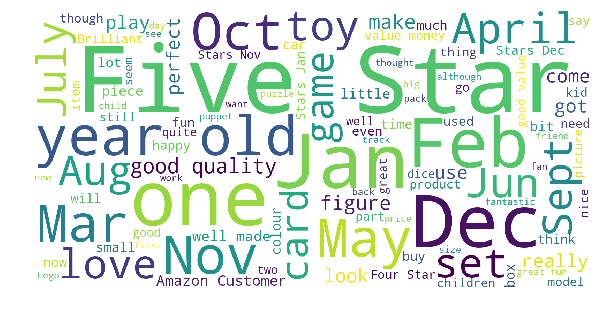

In [33]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def clean_data(text):
   letters_only = re.sub("[^a-zA-Z]", " ", text)
   words = letters_only.lower().split()
   return( " ".join( words ))


def create_cloud(rating):
   x= [i for i in rating]
   y= ' '.join(x)
   cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= STOPWORDS).generate(y)
   plt.figure(figsize=(10,8))
   plt.axis('off')
   plt.imshow(cloud)
   plt.show()

create_cloud(product['customer_reviews'])